In [5]:
import cv2 
import numpy as np
flag = 'carla'
if flag == 'oivio':

    im1 =  cv2.imread(r"C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660900894917888.png")
    im2 =  cv2.imread(r"C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660902595141888.png")
else:
    im1 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\001.png')
    im2 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\010.png')
print("im1.shape",im1.shape)
# Convert images to grayscale

im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 #im1 = tamplate 
# Find size of image1
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)    
    # warp_matrix = np.eye(4, 4, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
# Use warpPerspective for Homography
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results
# cv2.imshow("Image 1", im1)
# cv2.imshow("Image 2", im2)
# cv2.imshow("Aligned Image 2", im2_aligned)
# cv2.waitKey(0)
if flag =='oivio':
    cv2.imwrite(r'C:\Users\28340\Documents\UCL\finalYearProject\code\im2_aligned_oivio.png',im2_aligned)
else:
    cv2.imwrite(r'C:\Users\28340\Documents\UCL\finalYearProject\code\im2_aligned_carla.png',im2_aligned)
print(warp_matrix)

im1.shape (600, 800, 3)
[[ 1.         0.        -1.276705 ]
 [ 0.         1.         1.5852375]]


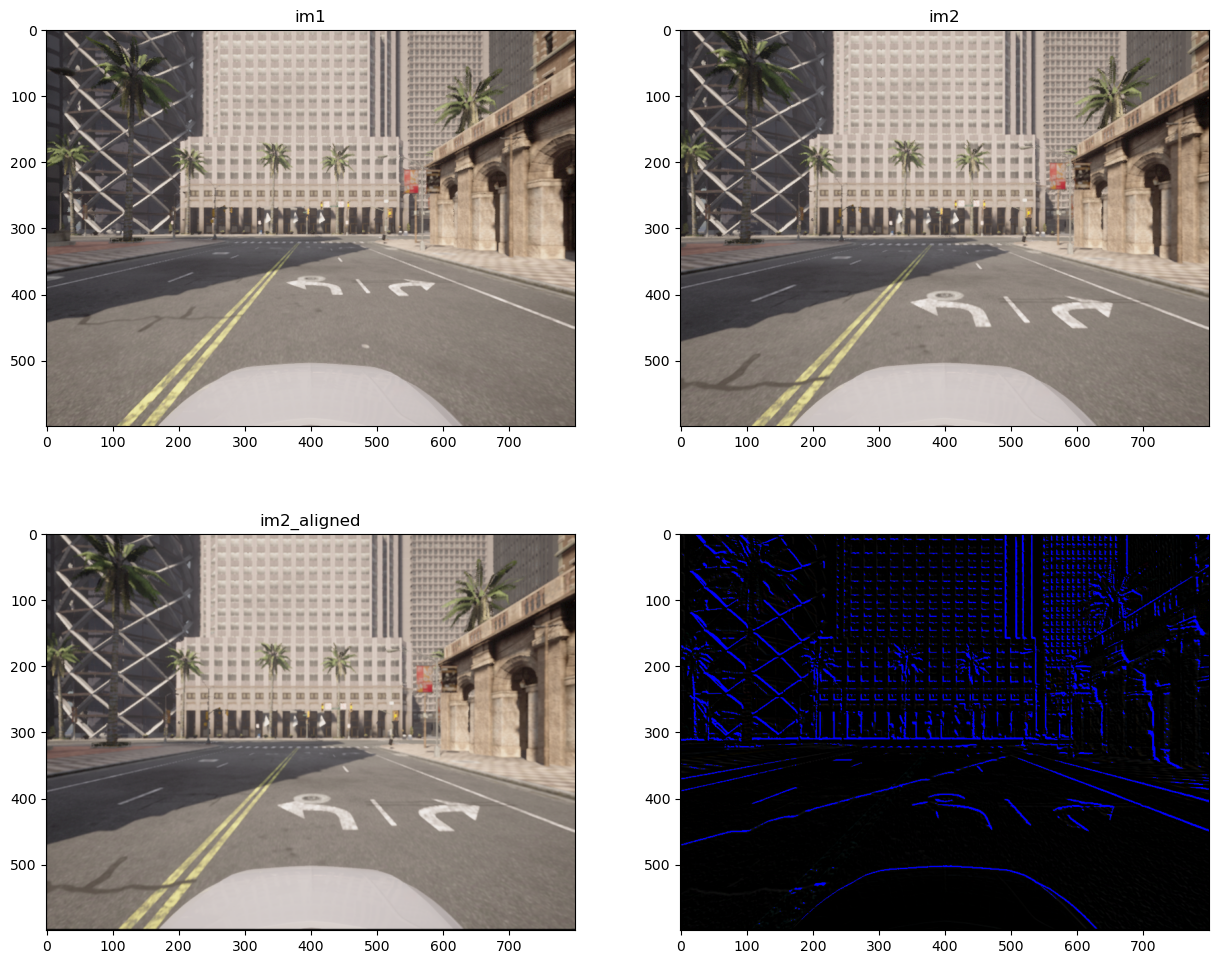

In [14]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2,figsize=(15,12))
ax[0,0].imshow(cv2.cvtColor(im1,cv2.COLOR_BGR2RGB))
ax[0,0].set_title('im1')
ax[0,1].imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
ax[0,1].set_title('im2')
ax[1,0].imshow(cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2RGB))
ax[1,0].set_title('im2_aligned')

difference = cv2.subtract(im2_aligned, im2)

Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

ax[1,1].imshow(difference)

In [15]:
import cv2 
import numpy as np
flag = 'carla'
if flag == 'oivio':

    im1 =  cv2.imread(r"C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660900894917888.png")
    im2 =  cv2.imread(r"C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660902595141888.png")
else:
    im1 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\001.png')
    im2 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\002.png')
print("im1.shape",im1.shape)
# Convert images to grayscale

im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 #im1 = tamplate 
# Find size of image1
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)    
    # warp_matrix = np.eye(4, 4, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
# Use warpPerspective for Homography
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results
# cv2.imshow("Image 1", im1)
# cv2.imshow("Image 2", im2)
# cv2.imshow("Aligned Image 2", im2_aligned)
# cv2.waitKey(0)
if flag =='oivio':
    cv2.imwrite(r'C:\Users\28340\Documents\UCL\finalYearProject\code\im2_aligned_oivio.png',im2_aligned)
else:
    cv2.imwrite(r'C:\Users\28340\Documents\UCL\finalYearProject\code\im2_aligned_carla.png',im2_aligned)
print(warp_matrix)

im1.shape (600, 800, 3)
[[ 1.          0.          0.15122367]
 [ 0.          1.         -0.1831332 ]]


Text(0.5, 1.0, 'im2aligned & im2 diff')

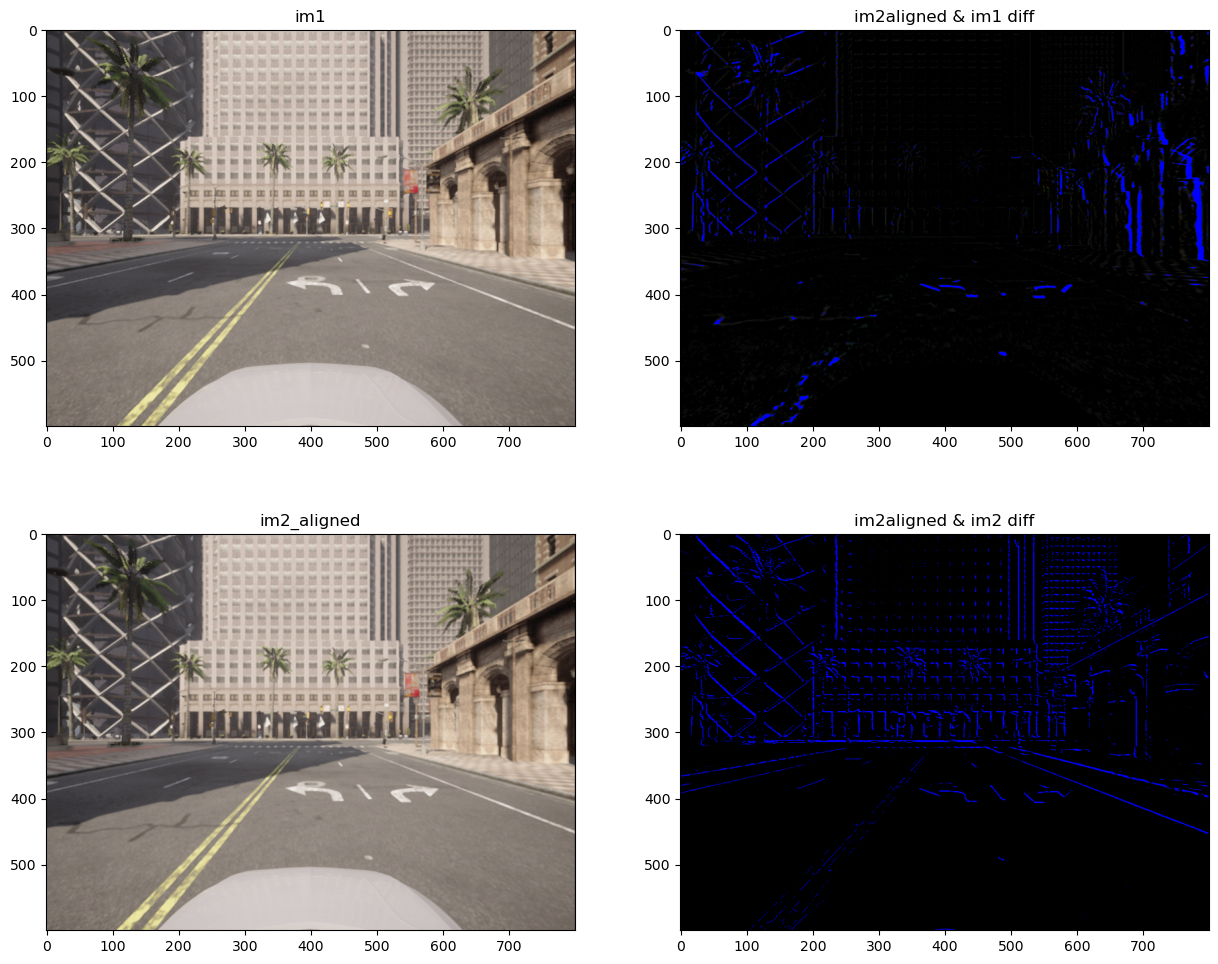

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2,figsize=(15,12))
ax[0,0].imshow(cv2.cvtColor(im1,cv2.COLOR_BGR2RGB))
ax[0,0].set_title('im1')
ax[0,1].imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
difference = cv2.subtract(im2_aligned, im1)

Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]
ax[0,1].set_title('im2aligned & im1 diff')
ax[0,1].imshow(difference)

ax[1,0].imshow(cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2RGB))
ax[1,0].set_title('im2_aligned')


difference = cv2.subtract(im2_aligned, im2)
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]
ax[1,1].imshow(difference)
ax[1,1].set_title('im2aligned & im2 diff')

In [18]:
import cv2 
import numpy as np
flag = 'oivio'
if flag == 'oivio':

    im1 =  cv2.imread(r"C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660900894917888.png")
    im2 =  cv2.imread(r"C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660902595141888.png")
else:
    im1 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\001.png')
    im2 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\010.png')
print("im1.shape",im1.shape)
# Convert images to grayscale

im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 #im1 = tamplate 
# Find size of image1
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)    
    # warp_matrix = np.eye(4, 4, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
# Use warpPerspective for Homography
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results
# cv2.imshow("Image 1", im1)
# cv2.imshow("Image 2", im2)
# cv2.imshow("Aligned Image 2", im2_aligned)
# cv2.waitKey(0)
if flag =='oivio':
    cv2.imwrite(r'C:\Users\28340\Documents\UCL\finalYearProject\code\im2_aligned_oivio.png',im2_aligned)
else:
    cv2.imwrite(r'C:\Users\28340\Documents\UCL\finalYearProject\code\im2_aligned_carla.png',im2_aligned)
print(warp_matrix)

im1.shape (720, 1280, 3)
[[  1.         0.        31.108746]
 [  0.         1.       -65.695435]]


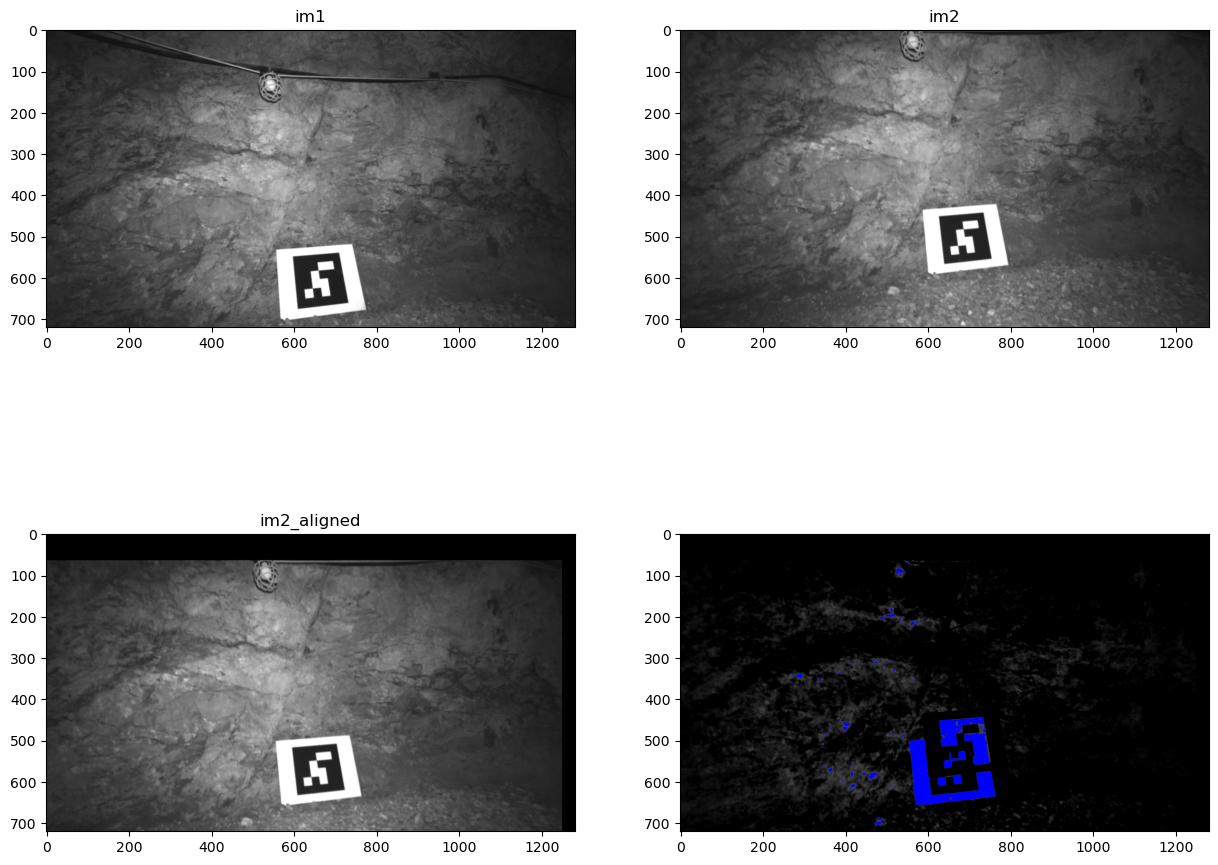

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2,figsize=(15,12))
ax[0,0].imshow(cv2.cvtColor(im1,cv2.COLOR_BGR2RGB))
ax[0,0].set_title('im1')
ax[0,1].imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
ax[0,1].set_title('im2')
ax[1,0].imshow(cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2RGB))
ax[1,0].set_title('im2_aligned')

difference = cv2.subtract(im2_aligned, im2)

Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

ax[1,1].imshow(difference)

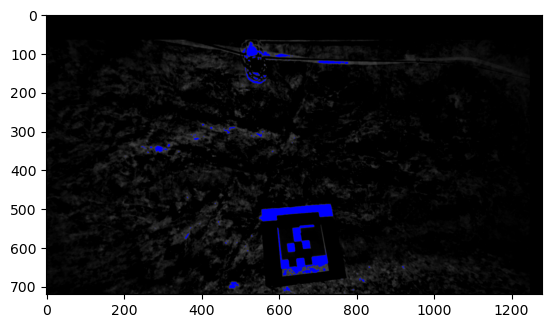

In [20]:
difference = cv2.subtract(im2_aligned, im1)
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]
plt.imshow(difference)